In [93]:
# libraries and dependencies
import numpy as np
import math
import matplotlib.pyplot as plt

import os
import sys
import random

import skimage.io as io
import pylab

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data
from torch.nn.utils.rnn import pack_padded_sequence
import torch.utils.data as data

import nltk
import time

import git
from git import Repo

from collections import Counter
import requests

%matplotlib inline
sys.path.insert(0,'/home/dnn/Storage8TB/pythonCodeArea/Alfahad/PythonAPI3/home')
# sys.path.append('./coco_ann')
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [2]:
from data_loader import get_loader
from coco import COCO
from model import EncoderCNN, DecoderRNN

In [3]:
# composing transformations to the testing image set
transforms_test=transforms.Compose([transforms.Resize(256),transforms.RandomCrop(224),
                                                    transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                                    transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.235))])
# create the data_loader
data_loader=get_loader(transform=transforms_test,mode='test')

Vocabulary successfully loaded from vocab.pkl file!


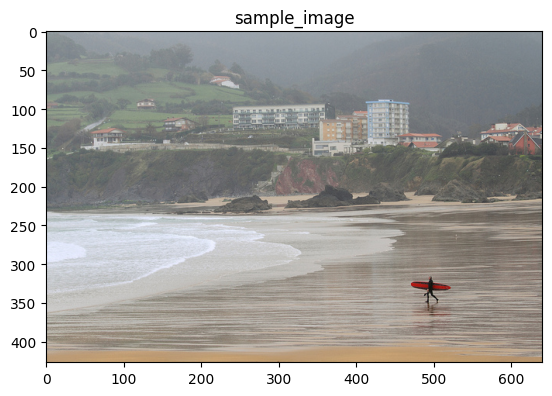

In [11]:
# obtaining the sample image before preprocessing
orig_image,image=next(iter(data_loader))

# displaying the sample image taken
plt.imshow(np.squeeze(orig_image))
plt.title('sample_image')
plt.show()

In [12]:
# load the saved encoder decoder weights
encoder_file='encoder-3.pkl'
decoder_file='decoder-3.pkl'

#select suitable values for the variables of the encoder decoder
embed_size=256
hidden_size=512
# size of vocabulary
vocab_size=len(data_loader.dataset.vocab)

#initializing encoder decoder and setting to inference mode
encoder=EncoderCNN(embed_size)
encoder.eval()
decoder=DecoderRNN(embed_size,hidden_size,vocab_size)
decoder.eval()

#loading the trained weigts
encoder.load_state_dict(torch.load(os.path.join('./PythonAPI3/home/models',encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./PythonAPI3/home/models',decoder_file)))

#move the models to GPU
encoder.to(device)
decoder.to(device)

/home/dnn/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dnn/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DecoderRNN(
  (embed): Embedding(9947, 256)
  (lstm): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=9947, bias=True)
  (softmax): Softmax(dim=2)
)

In [13]:
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 3, 335, 437, 13, 278, 21, 3, 277, 77, 32, 297, 18, 1]


In [14]:
def clean_sentence(output):
    cleaned_list = []
    for index in output:
        if  (index == 1) :
            continue
        cleaned_list.append(data_loader.dataset.vocab.idx2word[index])
    cleaned_list = cleaned_list[1:-1] # Discard <start> and <end> 

    sentence = ' '.join(cleaned_list) # Convert list of string to                                                    
    sentence = sentence.capitalize()    
    return sentence

In [15]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

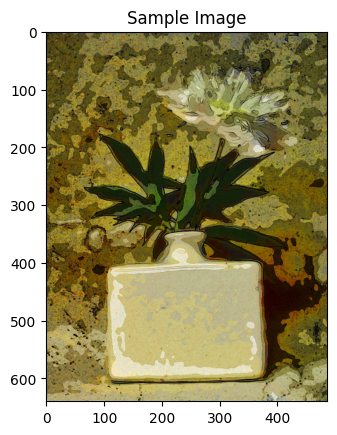

A vase with a flower in it 's side by side


In [16]:
get_prediction()

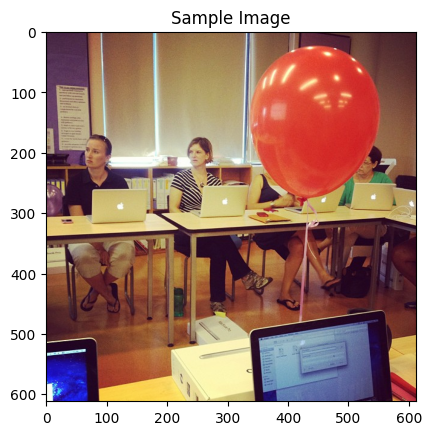

A man is playing a video game in a living room


In [18]:
get_prediction()

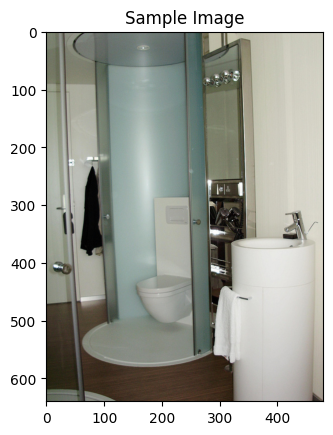

A bathroom with a toilet and a sink and a


In [19]:
get_prediction()

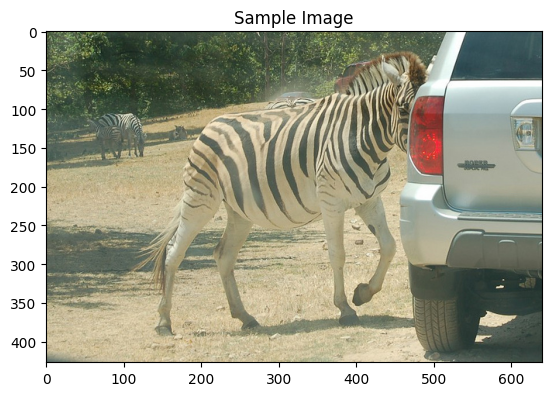

A zebra is standing in the middle of a field


In [22]:
get_prediction()

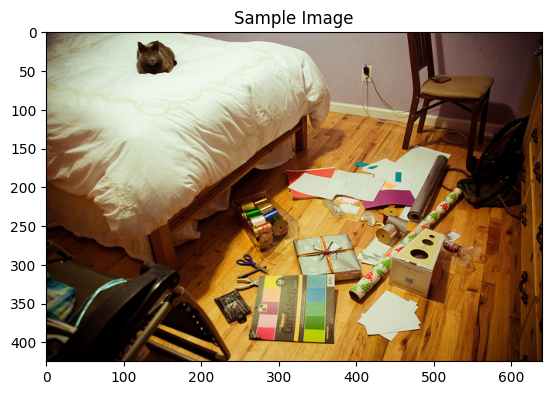

A bed with a colorful quilt on it


In [31]:
get_prediction()

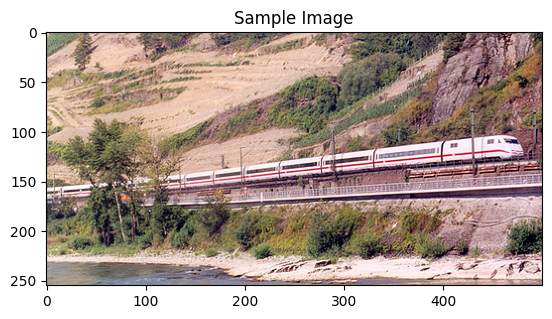

A train is going down the tracks in the


In [35]:
get_prediction()

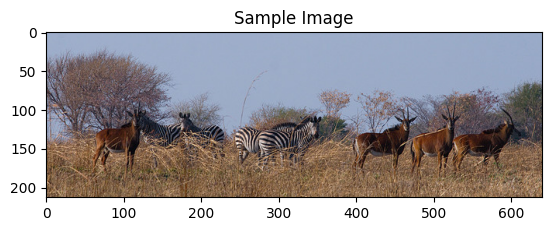

A group of zebras standing in a field


In [60]:
get_prediction()

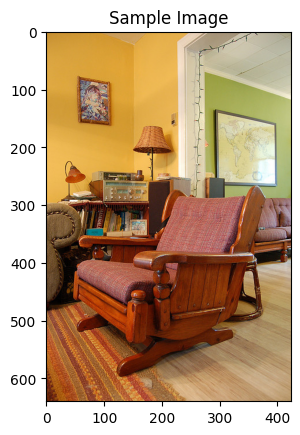

A living room with a couch and a coffee table


In [61]:
get_prediction()

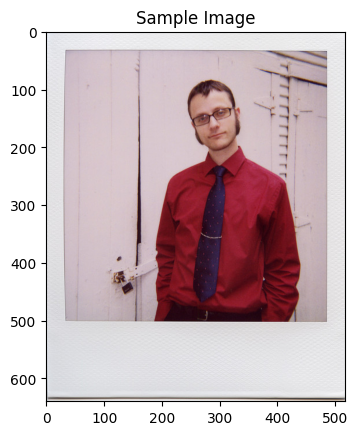

A man in a suit and tie is posing


In [63]:
get_prediction()

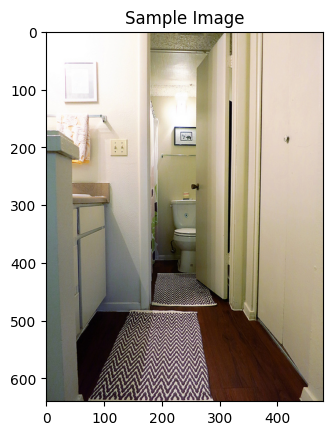

A bathroom with a toilet and a sink and a


In [66]:
get_prediction()